In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

In [174]:
default_sr = 22050
n_fft = 2048
duration = 10
unison_1, unison_2 = 440, 439.8

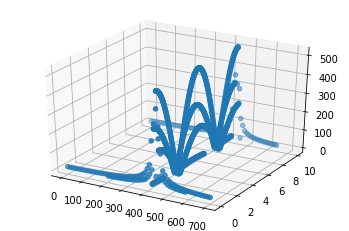

In [175]:
unison = (librosa.tone(unison_1, duration=duration) + librosa.tone(unison_2, duration=duration)) / 2
unison_cplx_mtx = librosa.stft(unison, n_fft=n_fft)
unison_x = librosa.fft_frequencies(sr=default_sr, n_fft=n_fft) # index to frequency
unison_y = np.arange(unison_cplx_mtx.shape[1]) * duration / unison_cplx_mtx.shape[1]

amp_thershold = 10

unison_xx = []
unison_yy = []
unison_zz = []

for i in range(len(unison_x)):
  if unison_x[i] > 2000:
    continue
  for j in range(len(unison_y)):
    if np.abs(unison_cplx_mtx[i][j]) < amp_thershold:
      continue
    unison_xx.append(unison_x[i])
    unison_yy.append(unison_y[j])
    unison_zz.append(np.abs(unison_cplx_mtx[i][j]))

ax = plt.axes(projection='3d')
ax.scatter3D(unison_xx, unison_yy, unison_zz)

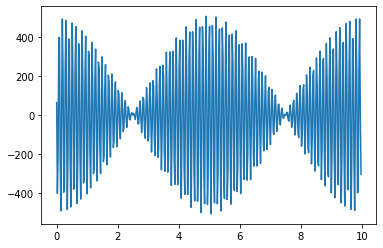

In [176]:
unison_index = np.abs(unison_x - unison_1).argmin()
plt.plot(unison_y, unison_cplx_mtx[unison_index].real)

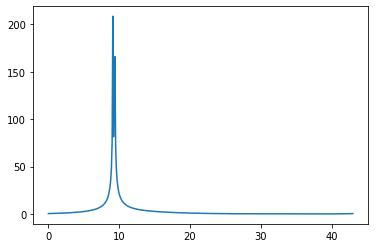

In [177]:
# doesnt arrive to what i want, just for reference
# use complex matrix as signals
unison_index = np.abs(unison_x - unison_1).argmin()
result = np.fft.fft(unison_cplx_mtx[unison_index]) / unison_cplx_mtx.shape[-1]
secondary_sr = unison_cplx_mtx.shape[-1] / duration
frequencies = secondary_sr * np.arange(unison_cplx_mtx.shape[-1]) / unison_cplx_mtx.shape[-1]
plt.plot(frequencies, np.abs(result.real))

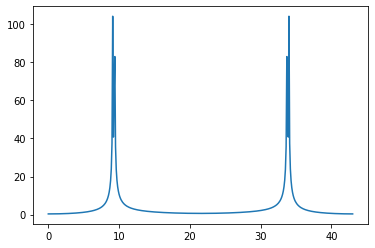

In [178]:
# doesnt arrive to what i want, just for reference
# use real component matrix as signals
unison_index = np.abs(unison_x - unison_1).argmin()
result = np.fft.fft(unison_cplx_mtx[unison_index].real) / unison_cplx_mtx.shape[-1]
secondary_sr = unison_cplx_mtx.shape[-1] / duration
frequencies = secondary_sr * np.arange(unison_cplx_mtx.shape[-1]) / unison_cplx_mtx.shape[-1]
plt.plot(frequencies, np.abs(result.real))

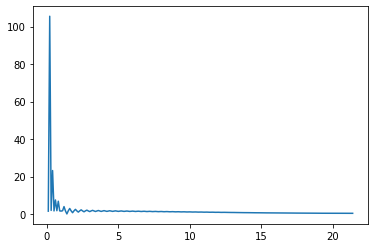

In [179]:
# use abs component matrix as signals
unison_index = np.abs(unison_x - unison_1).argmin()
result = np.fft.fft(np.abs(unison_cplx_mtx[unison_index])) / unison_cplx_mtx.shape[-1]
secondary_sr = unison_cplx_mtx.shape[-1] / duration
frequencies = secondary_sr * np.arange(unison_cplx_mtx.shape[-1]) / unison_cplx_mtx.shape[-1]
tail = len(frequencies) // 2

plt.plot(frequencies[1:tail], np.abs(result.real)[1:tail])

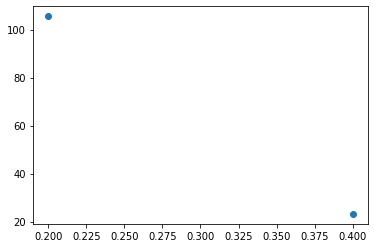

In [180]:
# filtering with thershold
thershold = 10
data = np.dstack((frequencies, np.abs(result.real)))[0]
mask = (data > thershold)[:, 1] & (data != 0)[:, 0]
rt = data[mask, ...]

x = rt.T[0][:len(rt.T[0])//2]
y = rt.T[1][:len(rt.T[1])//2]
plt.scatter(x, y)

In [181]:
candidates = rt[:len(rt)//2]
max_index = candidates[:, 1].argmax()
remain_candidates = np.delete(candidates, max_index, axis=0)
second_max_index = remain_candidates[:, 1].argmax()
if second_max_index >= max_index:
  second_max_index += 1
rt = f"{candidates[max_index, 0]} Hz" if candidates[max_index, 1] > candidates[second_max_index, 1] * 2 else "insignificant peak, fail to detect"

rt, np.abs(unison_1 - unison_2)

('0.2 Hz', 0.19999999999998863)